In [1]:
#imports 

import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv")

In [3]:
df.head()


,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


## Training VS Test Set

In [4]:
x=df.iloc[:,2:16]

In [5]:
print(x)


      bedrooms  bathrooms  size_sqft  min_to_subway  floor  building_age_yrs  \
0          0.0          1        480              9    2.0                17   
1          2.0          2       2000              4    1.0                96   
2          1.0          1        916              2   51.0                29   
3          1.0          1        975              3    8.0                31   
4          2.0          2       4800              3    4.0               136   
...        ...        ...        ...            ...    ...               ...   
3534       1.0          1        532              3    8.0                16   
3535       2.0          2        988              5   10.0                 9   
3536       0.0          1        250              2    5.0                96   
3537       1.0          1        651              6    5.0                14   
3538       1.0          1        816              4   11.0                 9   

      no_fee  has_roofdeck  has_washer_

In [6]:
df.size


63702

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
y=df['rent']


### Splitting the data into training and test set

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, test_size=0.2,random_state=6)


## Applying Multiple Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression


In [11]:
#creating and training the regression model 

mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# predicting our y variable that is rent 

y_predict = mlr.predict(x_test)


## Using our model to predict sonny's apartment rent on multiple features

In [13]:
sonny_apartment =[[1,1,620,16,1,98,1,0,1,0,0,1,1,0]]

predict=mlr.predict(sonny_apartment)

print("predicted rent : $%.2f" %predict)

predicted rent : $2393.58


### creating scatter plot for insights

In [14]:
import matplotlib.pyplot as plt

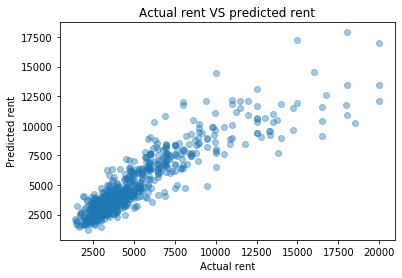

In [15]:
plt.scatter(y_test,y_predict, alpha =0.4)
plt.xlabel("Actual rent")
plt.ylabel("Predicted rent")

plt.title("Actual rent VS predicted rent")

plt.show()

### calculating coefficient

In [16]:
mlr.coef_


array([-302.73009383, 1199.3859951 ,    4.79976742,  -24.28993151,
         24.19824177,   -7.58272473, -140.90664773,   48.85017415,
        191.4257324 , -151.11453388,   89.408889  ,  -57.89714551,
        -19.31948556,  -38.92369828])

### Scatter plot for various features VS rent

Text(0, 0.5, 'Bedrooms')

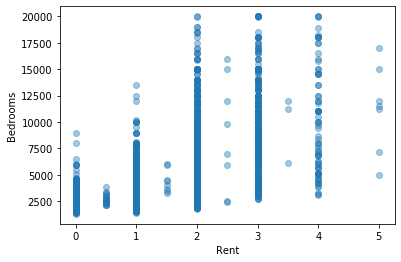

In [17]:
plt.scatter(df['bedrooms'],df['rent'],alpha=0.4);
plt.xlabel('Rent')
plt.ylabel('Bedrooms')

Text(0, 0.5, 'size in sqft')

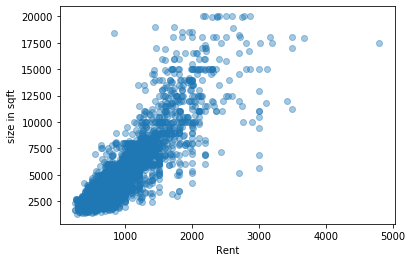

In [18]:
plt.scatter(df['size_sqft'],df['rent'],alpha =0.4);
plt.xlabel('Rent')
plt.ylabel('size in sqft')

Text(0, 0.5, 'minutes to subway')

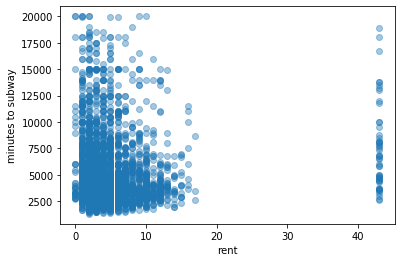

In [19]:
plt.scatter(df['min_to_subway'],df['rent'],alpha=0.4);
plt.xlabel('rent')
plt.ylabel('minutes to subway')

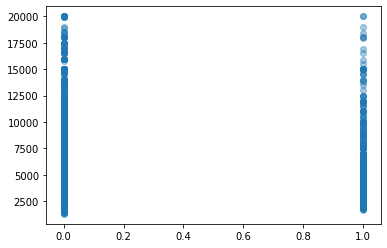

In [21]:
plt.scatter(df['has_washer_dryer'],df['rent'],alpha=0.4);


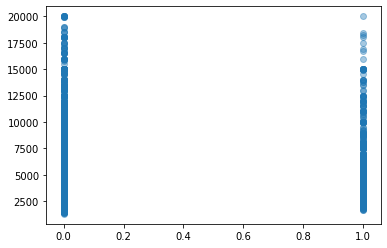

In [22]:
plt.scatter(df['has_dishwasher'],df['rent'],alpha=0.4)


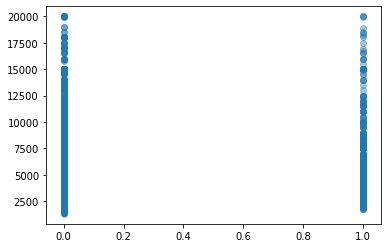

In [23]:
plt.scatter(df['has_gym'],df['rent'],alpha=0.4)


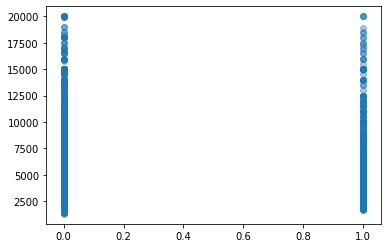

In [24]:
plt.scatter(df['has_doorman'],df['rent'],alpha=0.4)


In [25]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'building_age_yrs']]


In [26]:
mlr.score(x_train,y_train)


0.7725460559817883

In [27]:
mlr.score(x_test,y_test)


0.805037197535764

In [28]:
mlr.coef_


array([-302.73009383, 1199.3859951 ,    4.79976742,  -24.28993151,
         24.19824177,   -7.58272473, -140.90664773,   48.85017415,
        191.4257324 , -151.11453388,   89.408889  ,  -57.89714551,
        -19.31948556,  -38.92369828])